# Zusatzaufgabe Stereotracking
Stereooptisches Tracking von reflektierenden Markern im Raum ist das meist eingesetzte Navigationsverfahren im Operationsraum. Dabei werden Marker im Raum üblicherweise mit 2 (oder mehr) Kameras erfasst. Ist die Lagebeziehung der Kameras zueinander bekannt, kann aus den zwei 2D Kamerabildern die 3D Position des Markers im Raum bestimmt werden. In diesem Zusatzskript, das sich aktuell noch im Aufbau befindet und daher nach und nach ergänzt wird, soll der Prozess des Stereotrackings von Grund auf nachimplemtiert werden.
Aus gegebenen B/W Kamerabilder /-videos müssen die Marker mit

*   Bildverarbeitungstechniken segmentiert werden.
*   Die Kameras müssen anschließend zu einander kalibriert werden
*   bevor aus den segmentierten Bildern die 3D *Position* der Marker berechnet werden kann.
*   Im weiteren Verlauf muss dann aus den 3D Positionen einzelner Marker die *Lage* einer aus mehreren einzelnen Markern bestehenden Marker-Geometrie (auch Marker Stern genannt) mittels ICP-Registierung bestimmt werden.
*   Kombiniert mit der Information über den Zusammenhang zwischen Marker-Geometrie und Werkzeugspitze soll abschließend der 3D Pfad der Werkzeugspitze berechnet und dargestellt werden.


**Hinweis**: Die Aufgabe ist ein reines Zusatzangebot und soll euch die Möglichkeit geben einen Teil der in Curac gelehrten Methoden anhand einer zusammenhängenden Beispiel-Anwendung anzuwenden. Dies soll den häufig sehr herausfordernden Schritt von der Theorie in die Praxis erleichtern.
Da wir diese Aufgabe gerade erst aufbauen und im SoSe24 das erste Mal anbieten, würden wir uns sehr über euer Feedback freuen. Sind die Schritte nachvollziehbar? Könnt ihr mit Hilfe des Internets die Aufgaben lösen? Welche zusätzlichen Infos hätten geholfen?

# Import der Daten

Der folgende Block ist auszuführen um die Daten von GitHub einzubinden. Der Suborder "files" wird zunächst gelöscht und anschließend mit den Daten aus dem GitHub Repo gefüllt. Sollten in "files" eigene Daten enthalten sein, sind diese vor dem Ausführen in einen anderen Ordner zu verschieben, da sie ansonsten gelöscht werden!


In [1]:
import shutil
import os

if os.path.exists('./files'):
  shutil.rmtree('./files')

!git clone --single-branch --branch main --depth 1 https://github.com/LnBdd/Curac_Tracking_Task.git files

files = os.listdir('./files/files')
for file in files:
    source_path = os.path.join('./files/files', file)
    destination_path = os.path.join('./files', file)
    shutil.move(source_path, destination_path)

shutil.rmtree('./files/files')

Cloning into 'files'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 0), reused 19 (delta 0), pack-reused 0
Receiving objects: 100% (20/20), 2.20 MiB | 7.65 MiB/s, done.


# Segmentierung

Um die Marker zu Segmentieren, wird das Bild zunächst vorverarbeitet. Daraufhin werden Konturen im Bild gesucht und somit die Marker erkannt und in den Frames markiert.

Für die Bildverarbeitung wird überwiegend Open CV verwendet.

[Image Processing in OpenCV](https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html)

Die Segmentierung wird erst Schritt für Schritt durchgegangen, um die einzelnen Schritte zu verstehen. Daraufhin werden alle Schritte in einen Funkton geschrieben, um die Segmentierung für ein ganzes Video zu verwenden und in in späteren Abschnitten aufzurufen.

### Segmentierung in einzelnen Schritten

Hier wird die Segmentierung zunächst in einzelnen Schritten durchgegangen. Dabei sind im Code zwischendurch Lücken gelassen, die mit einem '?' markiert sind. Diese müssen mit passendem Code gefüllt werden, damit die Anwendung funktioniert.

### Lösung
Die Lösung der Einzelschritte kann der zusammengesetzten Funktion weiter unten entnommen werden!

Import der benötigten Module

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#from imshowtools import imshow # wenn vsc
from google.colab.patches import cv2_imshow as imshow # wenn google colab

Einlesen des Bildes

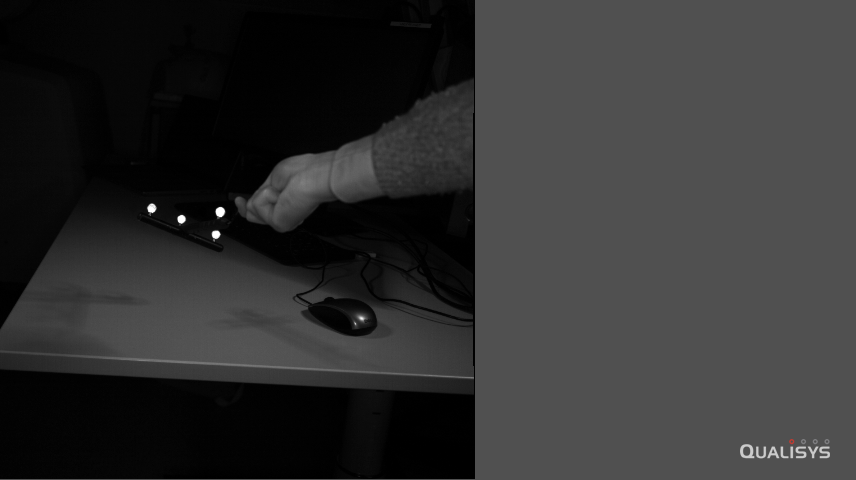

In [12]:
img = cv.imread("files/frame_segmentation.png")
imshow(img)

Dies ist das Ausgangsbild, bei dem die Marker segmentiert werden sollen.

Das Bild muss in Graustufen umgewandelt werden, um es weiter zu verarbeiten.

In [ ]:
gray_img = ?

Daraufhin muss ein Schwellwertverfahren angewendet werden. Dafür könnten in der Funktion verschiedene Paramater zur Anpassung der Schwellerte des Verfahrens gewählt werden.

In [ ]:
_, thresh = ?
imshow(thresh)

Bestenfalls sieht das Bild nach dem Schwellwertverfahren wie folgt aus:

In [ ]:
imshow(cv.imread("files/thresh_output.png"))

Nun muss das Rauschen aus dem Bild entfernt werden. Das kann einerseits durch die Glättung des Bilder erfolgen ([Smoothing Images](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)) oder durch Morphologische Transformationen ([Morphological Transformations](https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html)).

In [ ]:
kernel = ?
denoised = ?
imshow(denoised)

Bestenfalls sieht das Bild nach der Entfernung des Rauschens wie folgt aus:

In [ ]:
imshow(cv.imread("files\denoised_output.png"))

Nun können im vorverarbeiteten Bild die Konturen erkannt werden. Der Mittelpunkt jeder Kontour soll auf dem Eingangsbild markiert werden und die Koordinaten ausgegeben werden.

[Structural Analysis and Shape Descriptors](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html)

In [ ]:
contours, _ = ?

# Liste mit den Koordianten der Marker
marker_coordinates = []

# Für jeden Marker Rechtecke und Kreuze in das Originabild einzeichnen
for cnt in contours:

    # Boundingbox bestimmen und einzeichnen
    ?

    # Mittelpunkt berechnen und abspeichern
    ?

    # Mittelpunkte markieren
    ?

print(marker_coordinates)
imshow(img_marked)

Das Bild mit den markierten Markern sollte letzendlich ungefähr so aussehen:

In [ ]:
imshow(cv.imread("files/marked_output.png"))

### Segmentierung als Funktion

Das ganze Ablauf ist nachfolgend in eine Funktion geschrieben. Diese kann mit dem eingelesen Bild als Eingangsparameter aufgerufen werden und gibt die Koordinaten der Marker zurück. Sie ist für die weitere Verarbeitung der Marker-Daten relevant.

In [ ]:
def marker_segmentation(img):

    # Konvertierung des Bildes in Graustufen
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Binarisierung des Bildes mit Otsu-Methode
    _, thresh = cv.threshold(gray_img,200,255,0)

    # Rauschreduzierung
    kernel = np.ones((3, 3), np.uint8)
    denoised = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)

    # Konturen erkennen
    contours, _=cv.findContours(denoised, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    frame_marker_data = []

    # Rechtecke und Kreuze für jede Kontur zeichnen
    for cnt in contours:

        # Rechtecke
        x,y,w,h = cv.boundingRect(cnt)
        img_crosses = cv.rectangle(img,(x,y),(x+w,y+h),(255,255,0),1)

        # Mittelpunkt abspeichern
        x = x+w/2
        y = y+h/2
        frame_marker_data.append([x,y])

        # Kreuze
        x = int(x)
        y = int(y)
        img_crosses = cv.drawMarker(img_crosses, [x,y], color=[0,255,0], thickness=1)

    # create marked video
    marked_videos_list.append(img_crosses)

    cv.waitKey(0)
    cv.destroyAllWindows()

    return frame_marker_data

### Segmentierung eines Videos

Nachfolgend soll die Segmentierung der Marker auf ein ganzes Video angwendet werden.

Dazu wird zunächst eine Funktion vorgegeben, die zur Speicherung der einzelnen segmentierten Frames dient und ein Video erzeugt.

In [ ]:
def frames_to_video(frames, output_video_path, output_fps=30.0):
    # Dimension des ersten Frames
    height, width, _ = frames[0].shape

    # Codec definieren und VideoWriter-Objekt erstellen
    fourcc = cv.VideoWriter_fourcc(*'XVID')
    out = cv.VideoWriter(output_video_path, fourcc, output_fps, (width, height))

    # Über jeden Frame iterieren und in Output schreiben
    for frame in frames:
        out.write(frame)

    out.release()

    print("New video saved!")

Nun soll ein Video eingelesen werden und die Segmentierung auf jedes einzelne Frame angewendet werden. Diese sollten dann über die frames_to_video-Funktion abgespiechert werden.

In [ ]:
# Liste für die Koordinaten der Marker, die in der Methode befüllt wird
marker_data_list = []

# Liste mit markierten Bildern
marked_videos_list = []

cap = cv.VideoCapture('files/rec_segmentation.avi')
while(cap.isOpened()):
    ret, frame = ?
    if ret:
        ?
    else:
        break
cap.release()
cv.destroyAllWindows()

output_video_path = "files/output_video.avi"
frames_to_video(?)

# Kalibrierung
Um aus den segmentierten Videos die Stereo-Triangulation der Marker zu berechnen, müssen zunächst die Kameras kalibriert werden.

OpenCV-Doku: [Camera Calibration](https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html), [Camera Calibration and 3D Reconstruction](https://docs.opencv.org/4.x/d9/d0c/group__calib3d.html)

Die Kameras werden mittels Schachbrettmuster kalibiert. Zunächst wird jede Kamera separat intrinsisch kalibiert und anschließend wird eine Stereo-Kalibierung durchgeführt, um die extrinsischen Parameter zwischen beiden Kameras zu bestimmen.


Import der Module

In [ ]:
import numpy as np
import cv2
import glob

Zunächst muss die Größe des Musters bestimmt werden. Hierzu müssen die Anzahl der Zeilen und Spalten der inneren Ecken festgelegt werden. Es wurde das folgende Muster verwendet:

In [ ]:
imshow(cv2.imread("files/checkerboard_radon.png"))

Anzahl der Eckpunkte festlegen (Zeilen, Spalten)

In [ ]:
pattern_size = ?

Arrays zur Speicherung von Objektpunkten und Bildpunkten aus allen Bildern anlegen

In [ ]:
objpoints = []  # 3D-Objektpunkte in Weltkoordinaten
imgpoints_left = []  # 2D-Punkte in Bildkoordinaten (linke Kamera)
imgpoints_right = []  # 2D-Punkte in Bildkoordinaten (rechte Kamera)

3D-Punkte in Echtwelt-Koordinaten

In [ ]:
objp = np.zeros((pattern_size[0] * pattern_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape(-1, 2)

Pfade zu den Bildern für die Kalibierung angeben

In [ ]:
images_left = glob.glob('files/img_left/*.png')
images_right = glob.glob('files/img_right/*.png')

In jedem Bild das Schachbrettmuster finden und die Punkte extrahieren

In [ ]:
for image_left_path, image_right_path in zip(images_left, images_right):

    image_left = ?
    image_right = ?

    # Zu Grauwerten konvertieren
    gray_left = ?
    gray_right = ?

    # Schachbrettmuster finden
    ret_left, corners_left = ?
    ret_right, corners_right = ?

    # Wenn das Muster in beiden Bildern gefunden wurde, die Punkte hinzufügen
    if ret_left and ret_right:
        objpoints.append(objp)

        # Genauigkeit der Eckpunkte verbessern
        # Kriterium: Stoppt Iteration, wenn angegebene Genauigkeit oder max. Anzahl an Iterationen erreicht
        criteria = (cv2.TERM_CRITERIA_EPS +
                    cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

        corners_left_refined = cv2.cornerSubPix(?, ?, (11, 11), (-1, -1), criteria)
        imgpoints_left.append(corners_left_refined)

        corners_right_refined = cv2.cornerSubPix(?, ?, (11, 11), (-1, -1), criteria)
        imgpoints_right.append(corners_right_refined)

Kamerakalibrierung für die linke und rechte Kamera durchführen mit ermittelten 3D-Punkten und entsprechenden 2D-Pixelkoordinaten

In [ ]:
ret_left, mtx_left, dist_left, _, _ = ?(?, ?, gray_left.shape[::-1], None, None)
ret_right, mtx_right, dist_right, _, _ = ?(?, ?, gray_right.shape[::-1], None, None)

Stereo-Kalibrierung durchführen, um extrinsiche Parameter zu berechnen

In [ ]:
flags = cv2.CALIB_FIX_INTRINSIC  # Fixierung der intrinsischen Parameter, da sie bereits kalibriert sind
criteria_stereo = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
ret, mtx_left, dist_left, mtx_right, dist_right, R, T, E, F = ?(?, ?, ?,  ?, ?,  ?, ?,  gray_left.shape[::-1], criteria=criteria_stereo, flags=flags)

Mit diesen berechneten Parametern kann nachfolgend die Stereotriangulation durchgeführt werden.


# TO BE CONTINUED